# Predicting diabetes with pycaret

Daniel Kapitan  
2023-11-01

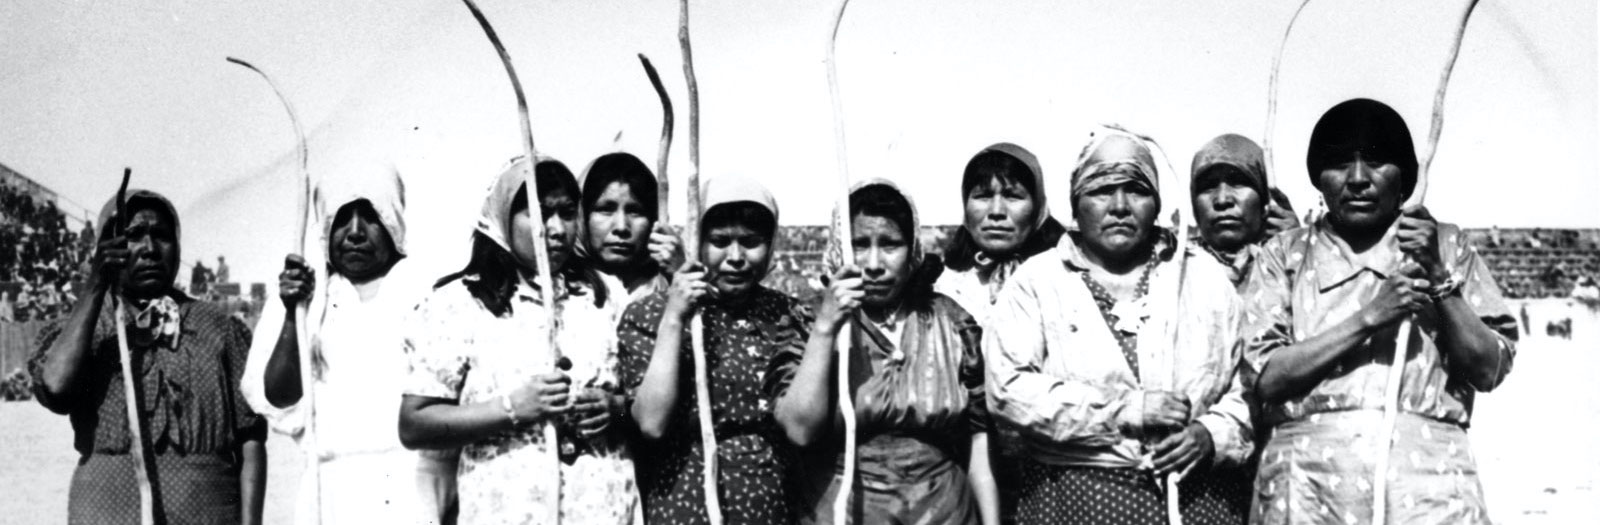

## Objectives

-   Example end-to-end supervised learning workflow with Pima Indians
-   Focus on conceptual understanding of machine learning
-   Demonstrate use of Predictive Power Score (PPS)
-   Demonstrate capabilities of low-code tools
-   Demonstrate use of `average_precision_score`
    ([link](https://github.com/pycaret/pycaret/issues/806#issuecomment-721993086))
-   Demonstrate SHAP values

## Attribution

### Dataset

-   Pima Indians paper ([original
    paper](../../resources/schulz2006effects.pdf))
-   Kaggle datacard
    ([link](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data))

### Python libraries

-   Altair ([docs](https://altair-viz.github.io/))
-   ydata-profiling ([docs](https://docs.profiling.ydata.ai/4.6/))
-   Predictive Power Score (PPS,
    [GitHub](https://github.com/8080labs/ppscore/),
    [blog](https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598))
-   PyCaret: open-source, low-code machine learning library in Python
    that automates machine learning workflows
    ([link](https://pycaret.org/))

In [1]:
import altair as alt
import pandas as pd
import ppscore as pps
from pycaret.classification import *
import shap
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport


# customize Altair
def y_axis():
    return {
        "config": {
            "axisX": {"grid": False},
            "axisY": {
                "domain": False,
                "gridDash": [2, 4],
                "tickSize": 0,
                "titleAlign": "right",
                "titleAngle": 0,
                "titleX": -5,
                "titleY": -10,
            },
            "view": {
                "stroke": "transparent",
                # To keep the same height and width as the default theme:
                "continuousHeight": 300,
                "continuousWidth": 400,
            },
        }
    }


alt.themes.register("y_axis", y_axis)
alt.themes.enable("y_axis");

## Read and explore the data

In [2]:
%%time
df = pd.read_csv("diabetes.csv").astype({"Outcome": bool})
train, test = train_test_split(df, test_size=0.3)
profile = ProfileReport(train, minimal=True, title="Pima Indians Profiling Report")
profile.to_file("pima-indians-profiling-report-minimal.html")

CPU times: user 5.54 s, sys: 184 ms, total: 5.72 s
Wall time: 1.7 s

In [3]:
profile.to_notebook_iframe()

<iframe width="100%" height="800px" srcdoc="<!doctype html><html lang=en><head><meta charset=utf-8><meta name=viewport content="width=device-width, initial-scale=1, shrink-to-fit=no"><meta name=description content="Profile report generated by YData! Visit us at https://ydata.ai"><meta name=author content="YData and the open source community."><meta name=generator content="Pandas Profiling vv4.6.1"><meta name=url content=https://github.com/ydataai/ydata-profiling><meta name=date content="2023-10-31 21:02:38.849227"><title>Pima Indians Profiling Report</title><style>
/*!
 * Bootstrap v3.3.7 (http://getbootstrap.com)
 * Copyright 2011-2016 Twitter, Inc.
 * Licensed under MIT (https://github.com/twbs/bootstrap/blob/master/LICENSE)
 *//*! normalize.css v3.0.3 | MIT License | github.com/necolas/normalize.css */html{font-family:sans-serif;-webkit-text-size-adjust:100%;-ms-text-size-adjust:100%}body{margin:0}article,aside,details,figcaption,figure,footer,header,hgroup,main,menu,nav,section,summary{display:block}audio,canvas,progress,video{display:inline-block;vertical-align:baseline}audio:not([controls]){display:none;height:0}[hidden],template{display:none}a{background-color:transparent}a:active,a:hover{outline:0}abbr[title]{border-bottom:1px dotted}b,strong{font-weight:700}dfn{font-style:italic}h1{margin:.67em 0;font-size:2em}mark{color:#000;background:#ff0}small{font-size:80%}sub,sup{position:relative;font-size:75%;line-height:0;vertical-align:baseline}sup{top:-.5em}sub{bottom:-.25em}img{border:0}svg:not(:root){overflow:hidden}figure{margin:1em 40px}hr{height:0;-webkit-box-sizing:content-box;-moz-box-sizing:content-box;box-sizing:content-box}pre{overflow:auto}code,kbd,pre,samp{font-family:monospace,monospace;font-size:1em}button,input,optgroup,select,textarea{margin:0;font:inherit;color:inherit}button{overflow:visible}button,select{text-transform:none}button,html input[type=button],input[type=reset],input[type=submit]{-webkit-appearance:button;cursor:pointer}button[disabled],html input[disabled]{cursor:default}button::-moz-focus-inner,input::-moz-focus-inner{padding:0;border:0}input{line-height:normal}input[type=checkbox],input[type=radio]{-webkit-box-sizing:border-box;-moz-box-sizing:border-box;box-sizing:border-box;padding:0}input[type=number]::-webkit-inner-spin-button,input[type=number]::-webkit-outer-spin-button{height:auto}input[type=search]{-webkit-box-sizing:content-box;-moz-box-sizing:content-box;box-sizing:content-box;-webkit-appearance:textfield}input[type=search]::-webkit-search-cancel-button,input[type=search]::-webkit-search-decoration{-webkit-appearance:none}fieldset{padding:.35em .625em .75em;margin:0 2px;border:1px solid silver}legend{padding:0;border:0}textarea{overflow:auto}optgroup{font-weight:700}table{border-spacing:0;border-collapse:collapse}td,th{padding:0}/*! Source: https://github.com/h5bp/html5-boilerplate/blob/master/src/css/main.css */@media print{*,:after,:before{color:#000!important;text-shadow:none!important;background:0 0!important;-webkit-box-shadow:none!important;box-shadow:none!important}a,a:visited{text-decoration:underline}a[href]:after{content:" (" attr(href) ")"}abbr[title]:after{content:" (" attr(title) ")"}a[href^="javascript:"]:after,a[href^="#"]:after{content:""}blockquote,pre{border:1px solid #999;page-break-inside:avoid}thead{display:table-header-group}img,tr{page-break-inside:avoid}img{max-width:100%!important}h2,h3,p{orphans:3;widows:3}h2,h3{page-break-after:avoid}.navbar{display:none}.btn>.caret,.dropup>.btn>.caret{border-top-color:#000!important}.label{border:1px solid #000}.table{border-collapse:collapse!important}.table td,.table th{background-color:#fff!important}.table-bordered td,.table-bordered th{border:1px solid #ddd!important}}@font-face{font-family:'Glyphicons Halflings';src:url(../fonts/glyphicons-halflings-regular.eot);src:url(../fonts/glyphicons-halflings-regular.eot?#iefix) format('embedded-opentype'),url(../fonts/glyphicons-halflings-regular.woff2) format('woff2'),url(

## Investigate features with largest predictive power

We use the Predictive Power Score to evaluate which features have the
highest predictive power with respect to `Outcome`.

In [4]:
predictors = (
    pps.predictors(train, "Outcome")
    .round(3)
    .iloc[:, :-1]
)
base = (
    alt.Chart(predictors)
    .encode(
        y=alt.Y("x:N").sort("-x"),
        x="ppscore",
        tooltip=["x", "ppscore"],
    )
)
base.mark_bar() + base.mark_text(align="center", dy=-5)

## Investigate colinearity

In [5]:
pps.matrix(train)

81 rows × 9 columns

In [6]:
pps_matrix = (
    pps.matrix(
        train.loc[:, predictors.query("ppscore > 0")["x"].tolist()],
    )
    .loc[:, ["x", "y", "ppscore"]]
    .round(3)
)
(
    alt.Chart(pps_matrix)
    .mark_rect()
    .encode(
        x="x:O",
        y="y:O",
        color="ppscore:Q",
        tooltip=["x", "y", "ppscore"])
).properties(width=500, height=500)

## Build models

In [7]:
cls = setup(data = train, 
             target = 'Outcome',
             numeric_imputation = 'mean',
             feature_selection = False,
             pca=False,
             remove_multicollinearity=True,
             remove_outliers = False,
             normalize = True,
             )
add_metric('apc', 'APC', average_precision_score, target = 'pred_proba');

In [8]:
%%time
best_model = compare_models(include=["et", "lightgbm", "rf", "dt"], sort="APC")

CPU times: user 537 ms, sys: 135 ms, total: 672 ms
Wall time: 3.96 s

## Evaluation

In [9]:
predictions = (
    predict_model(best_model, data=test.iloc[:, :-1])
)
predictions.head()

In [10]:
evaluate_model(best_model)

## SHAP

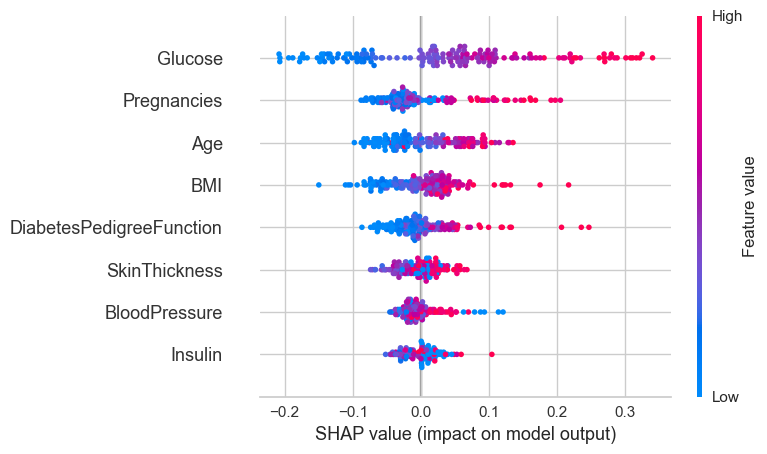

In [11]:
interpret_model(best_model)

In [12]:
interpret_model(best_model, plot="reason", observation=1)

Visualization omitted, Javascript library not loaded! 
 Have you run `initjs()` in this notebook? If this notebook was from another
 user you must also trust this notebook (File -> Trust notebook). If you are viewing
 this notebook on github the Javascript has been stripped for security. If you are using
 JupyterLab this error is because a JupyterLab extension has not yet been written.

In [13]:
interpret_model(best_model, plot="reason")

Visualization omitted, Javascript library not loaded! 
 Have you run `initjs()` in this notebook? If this notebook was from another
 user you must also trust this notebook (File -> Trust notebook). If you are viewing
 this notebook on github the Javascript has been stripped for security. If you are using
 JupyterLab this error is because a JupyterLab extension has not yet been written.